In [2]:
import pandas as pd
import numpy as np
import plotly.express as px
from matplotlib import pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.holtwinters import SimpleExpSmoothing 
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.preprocessing import StandardScaler

In [3]:
sales = pd.read_pickle("../Data/sales_half-day.pkl")
sales.head()


,date,total_amount
0,2009-12-01 am,22323.51
1,2009-12-01 pm,15042.81
2,2009-12-02 am,30036.27
3,2009-12-02 pm,15608.40
4,2009-12-03 am,19409.01


In [4]:
len(sales)

1207

In [5]:
sales_train = pd.DataFrame(sales.iloc[:int(sales.shape[0]*0.8)])
sales_test = pd.DataFrame(sales.iloc[int(sales.shape[0]*0.8):])

In [6]:
print(sales_train.head())

            date  total_amount
0  2009-12-01 am      22323.51
1  2009-12-01 pm      15042.81
2  2009-12-02 am      30036.27
3  2009-12-02 pm      15608.40
4  2009-12-03 am      19409.01


In [7]:
print(sales_test.head())

              date  total_amount
965  2011-07-20 pm      12803.83
966  2011-07-21 am      10722.23
967  2011-07-21 pm      15751.76
968  2011-07-22 am       7354.08
969  2011-07-22 pm       5621.60


In [8]:
fig = px.line(sales_train, x="date", y="total_amount", title="Sales by day")
fig.show()

In [9]:
len(sales_train)

965

/opt/homebrew/lib/python3.9/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning:

The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.



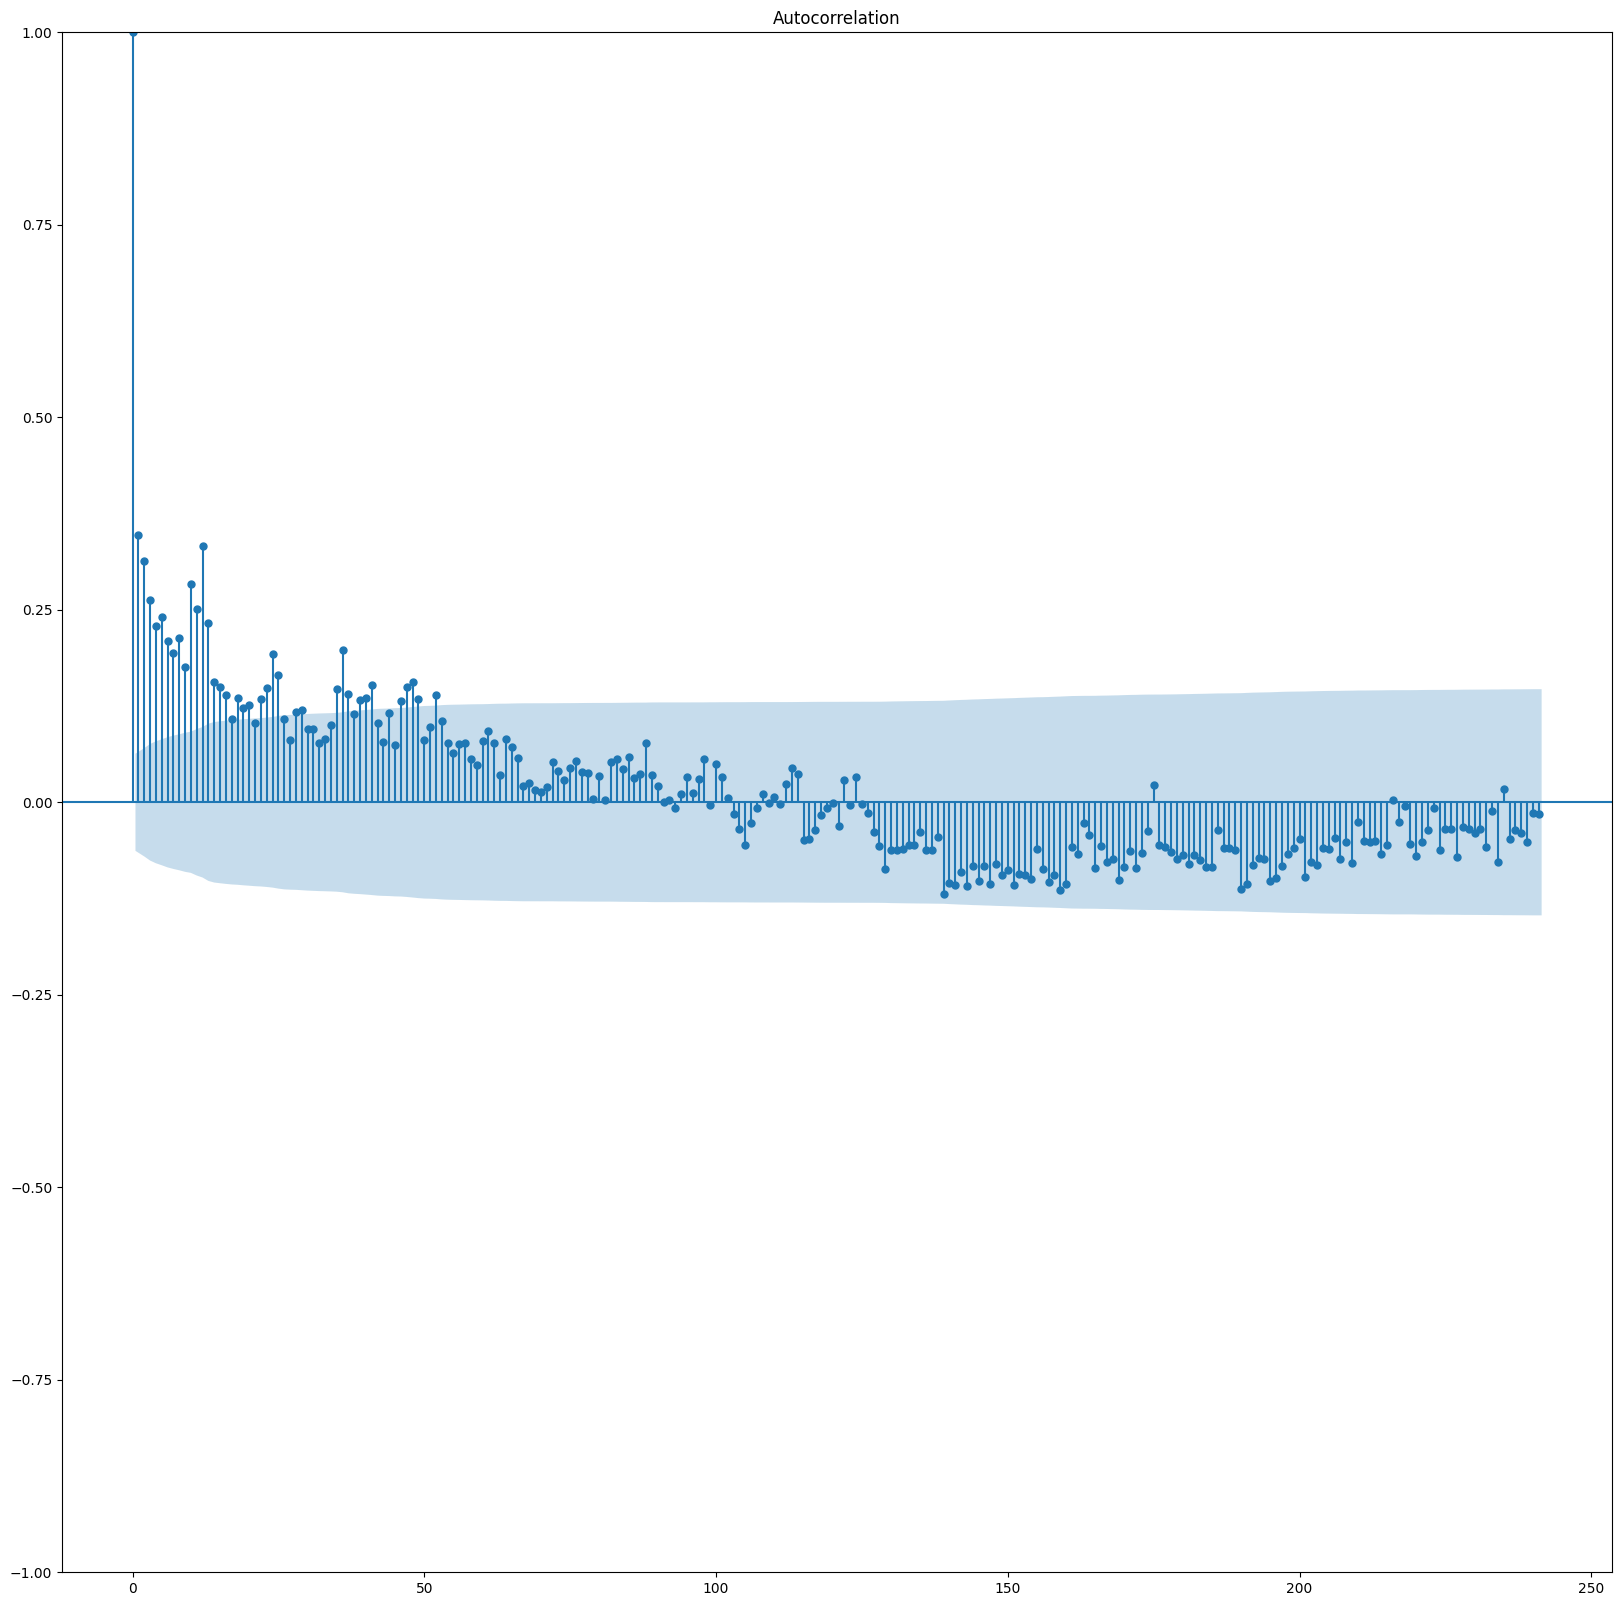

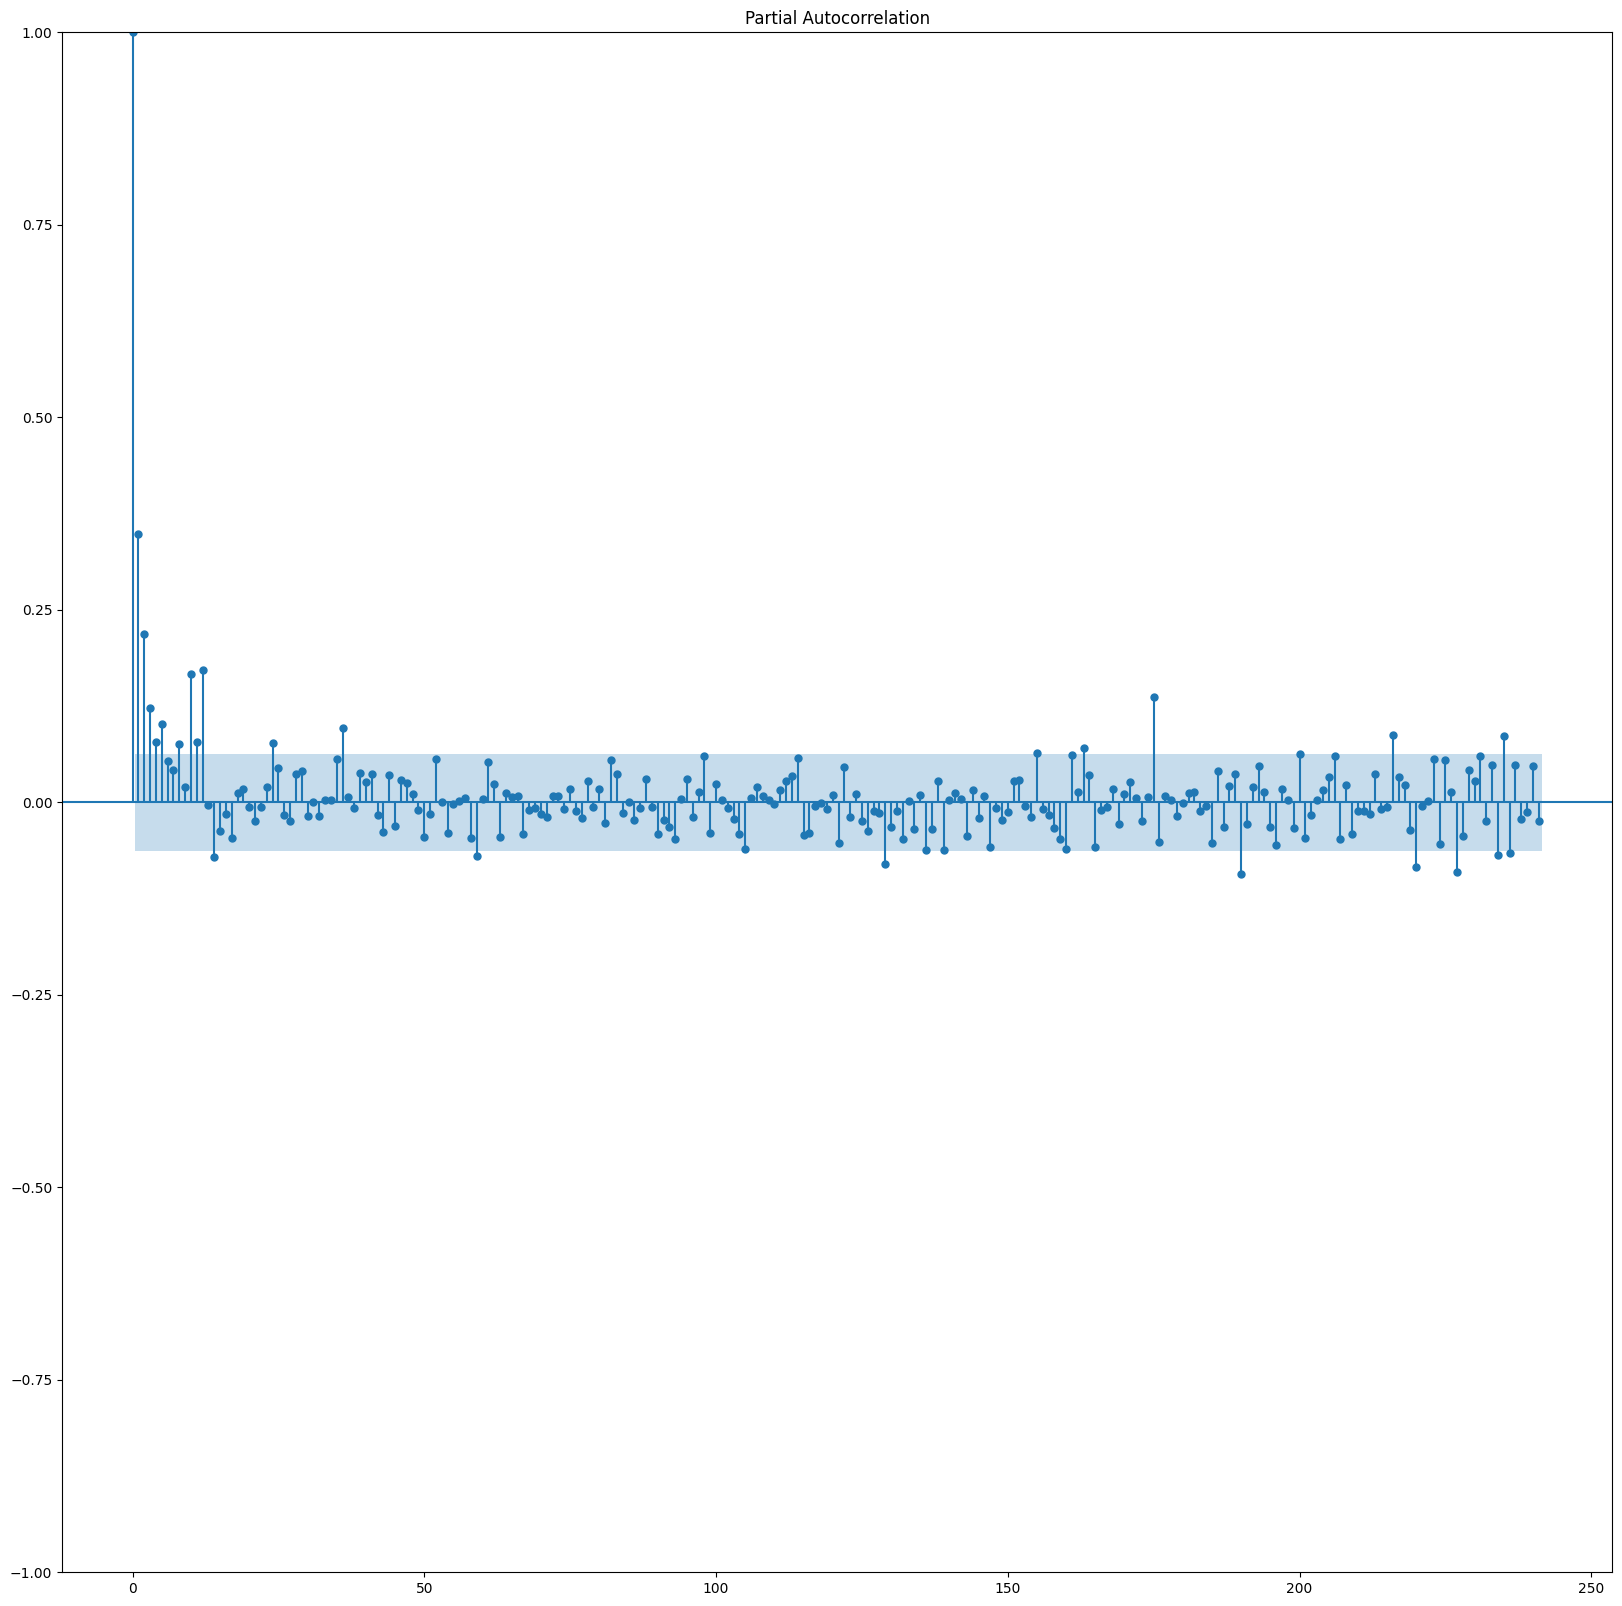

In [10]:
plt.rc("figure", figsize=(20,20))
plot_acf(sales_train["total_amount"], lags=int(len(sales_train)/4))
plot_pacf(sales_train["total_amount"], lags=int(len(sales_train)/4))
plt.show()


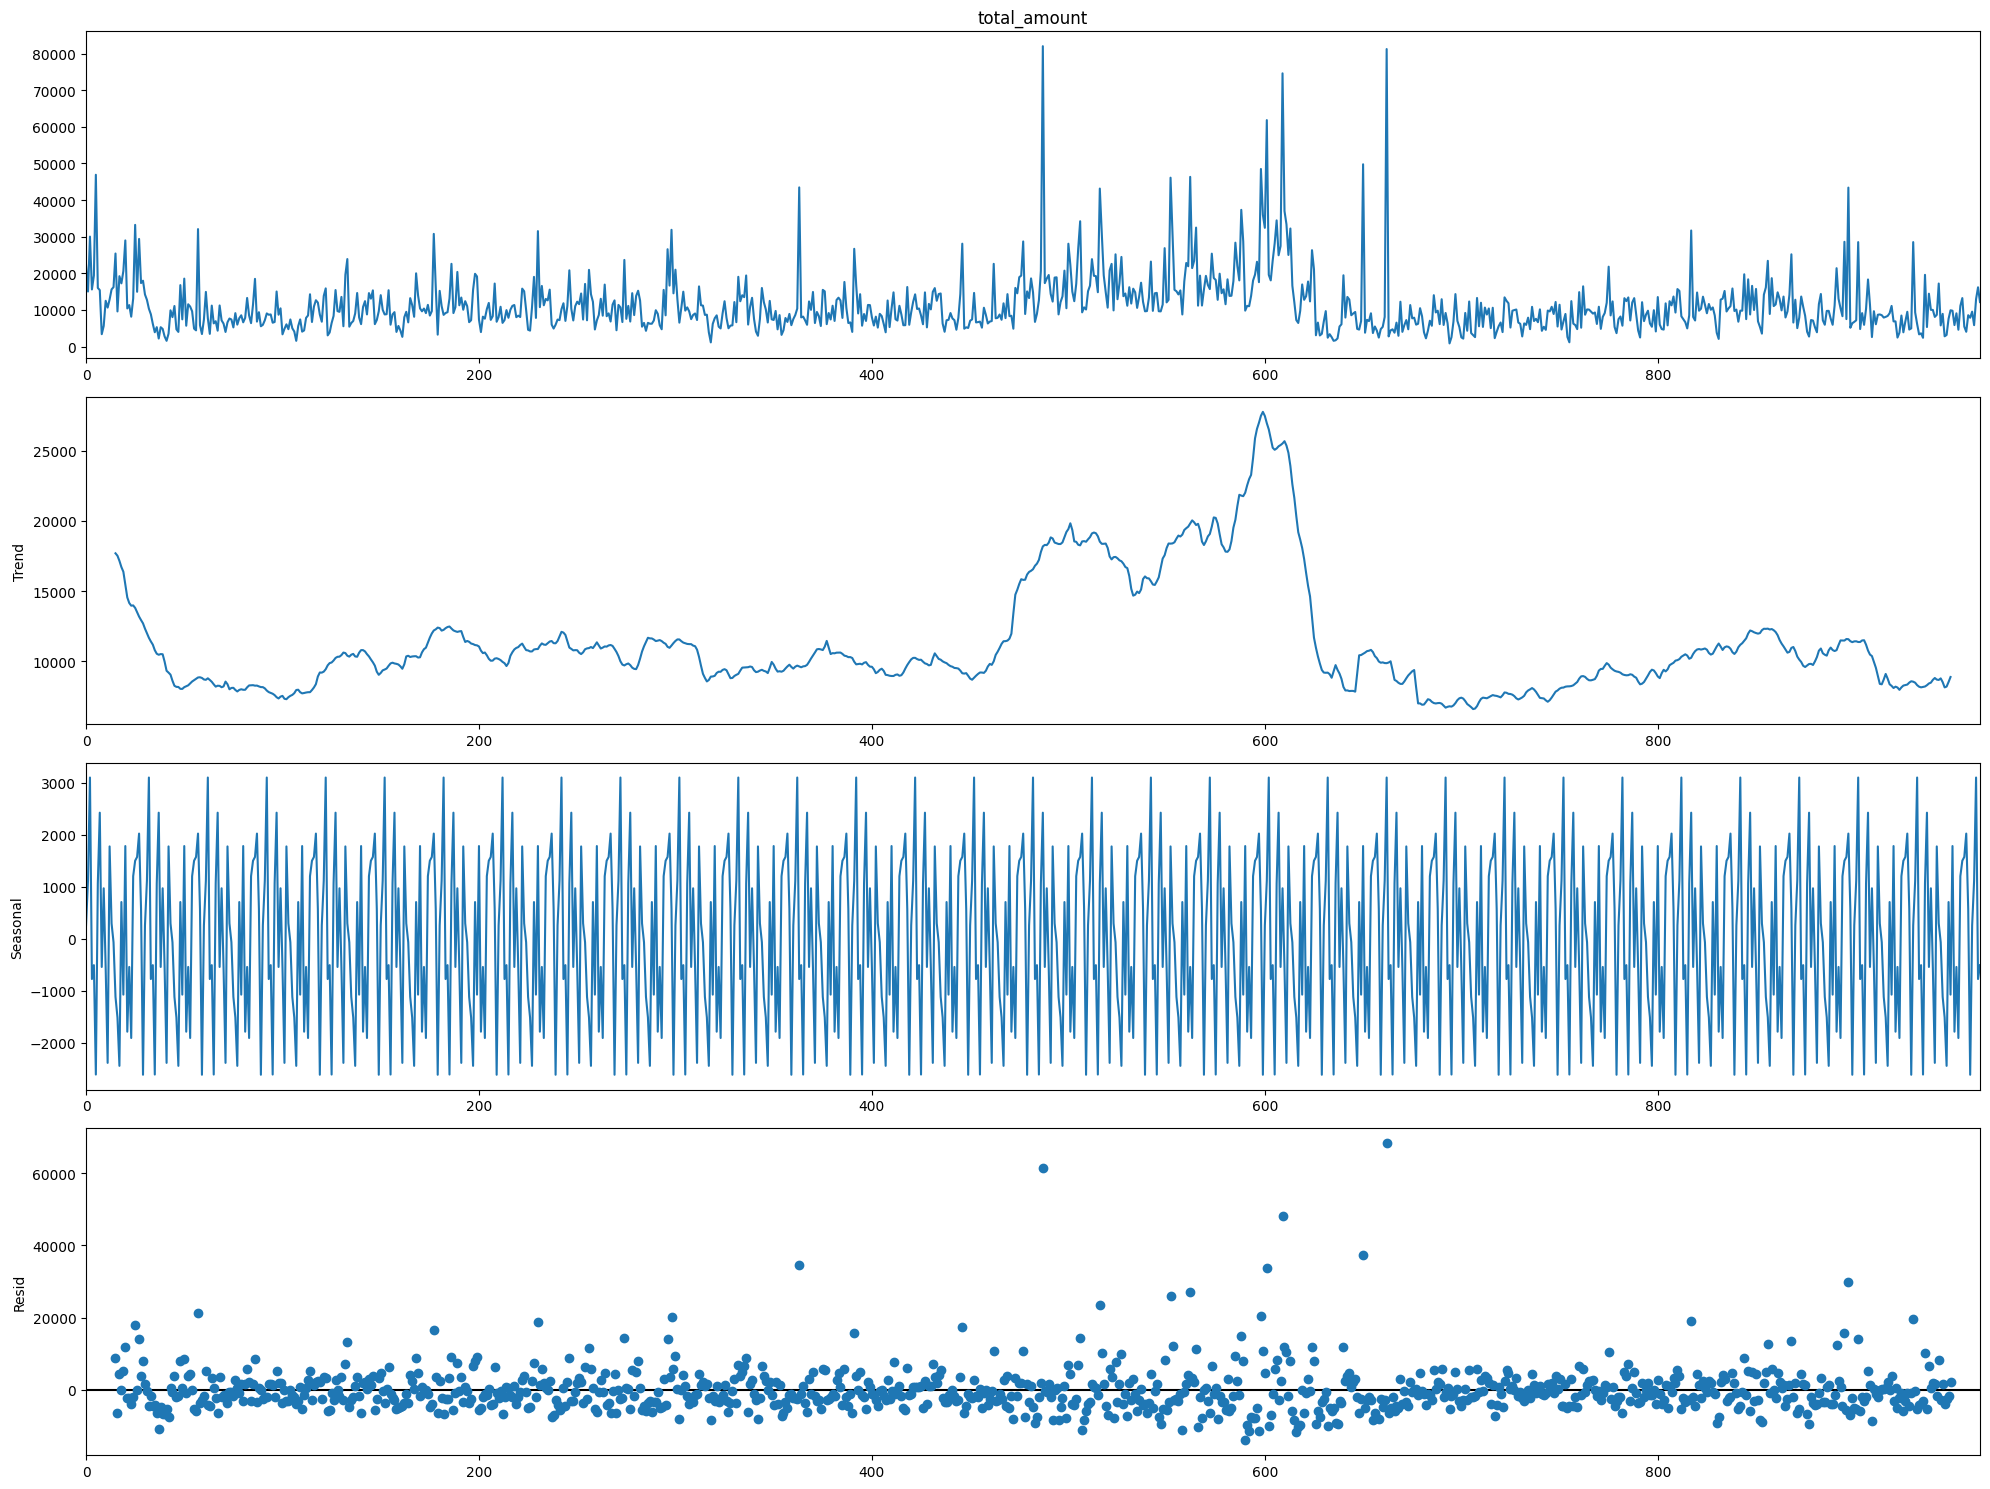

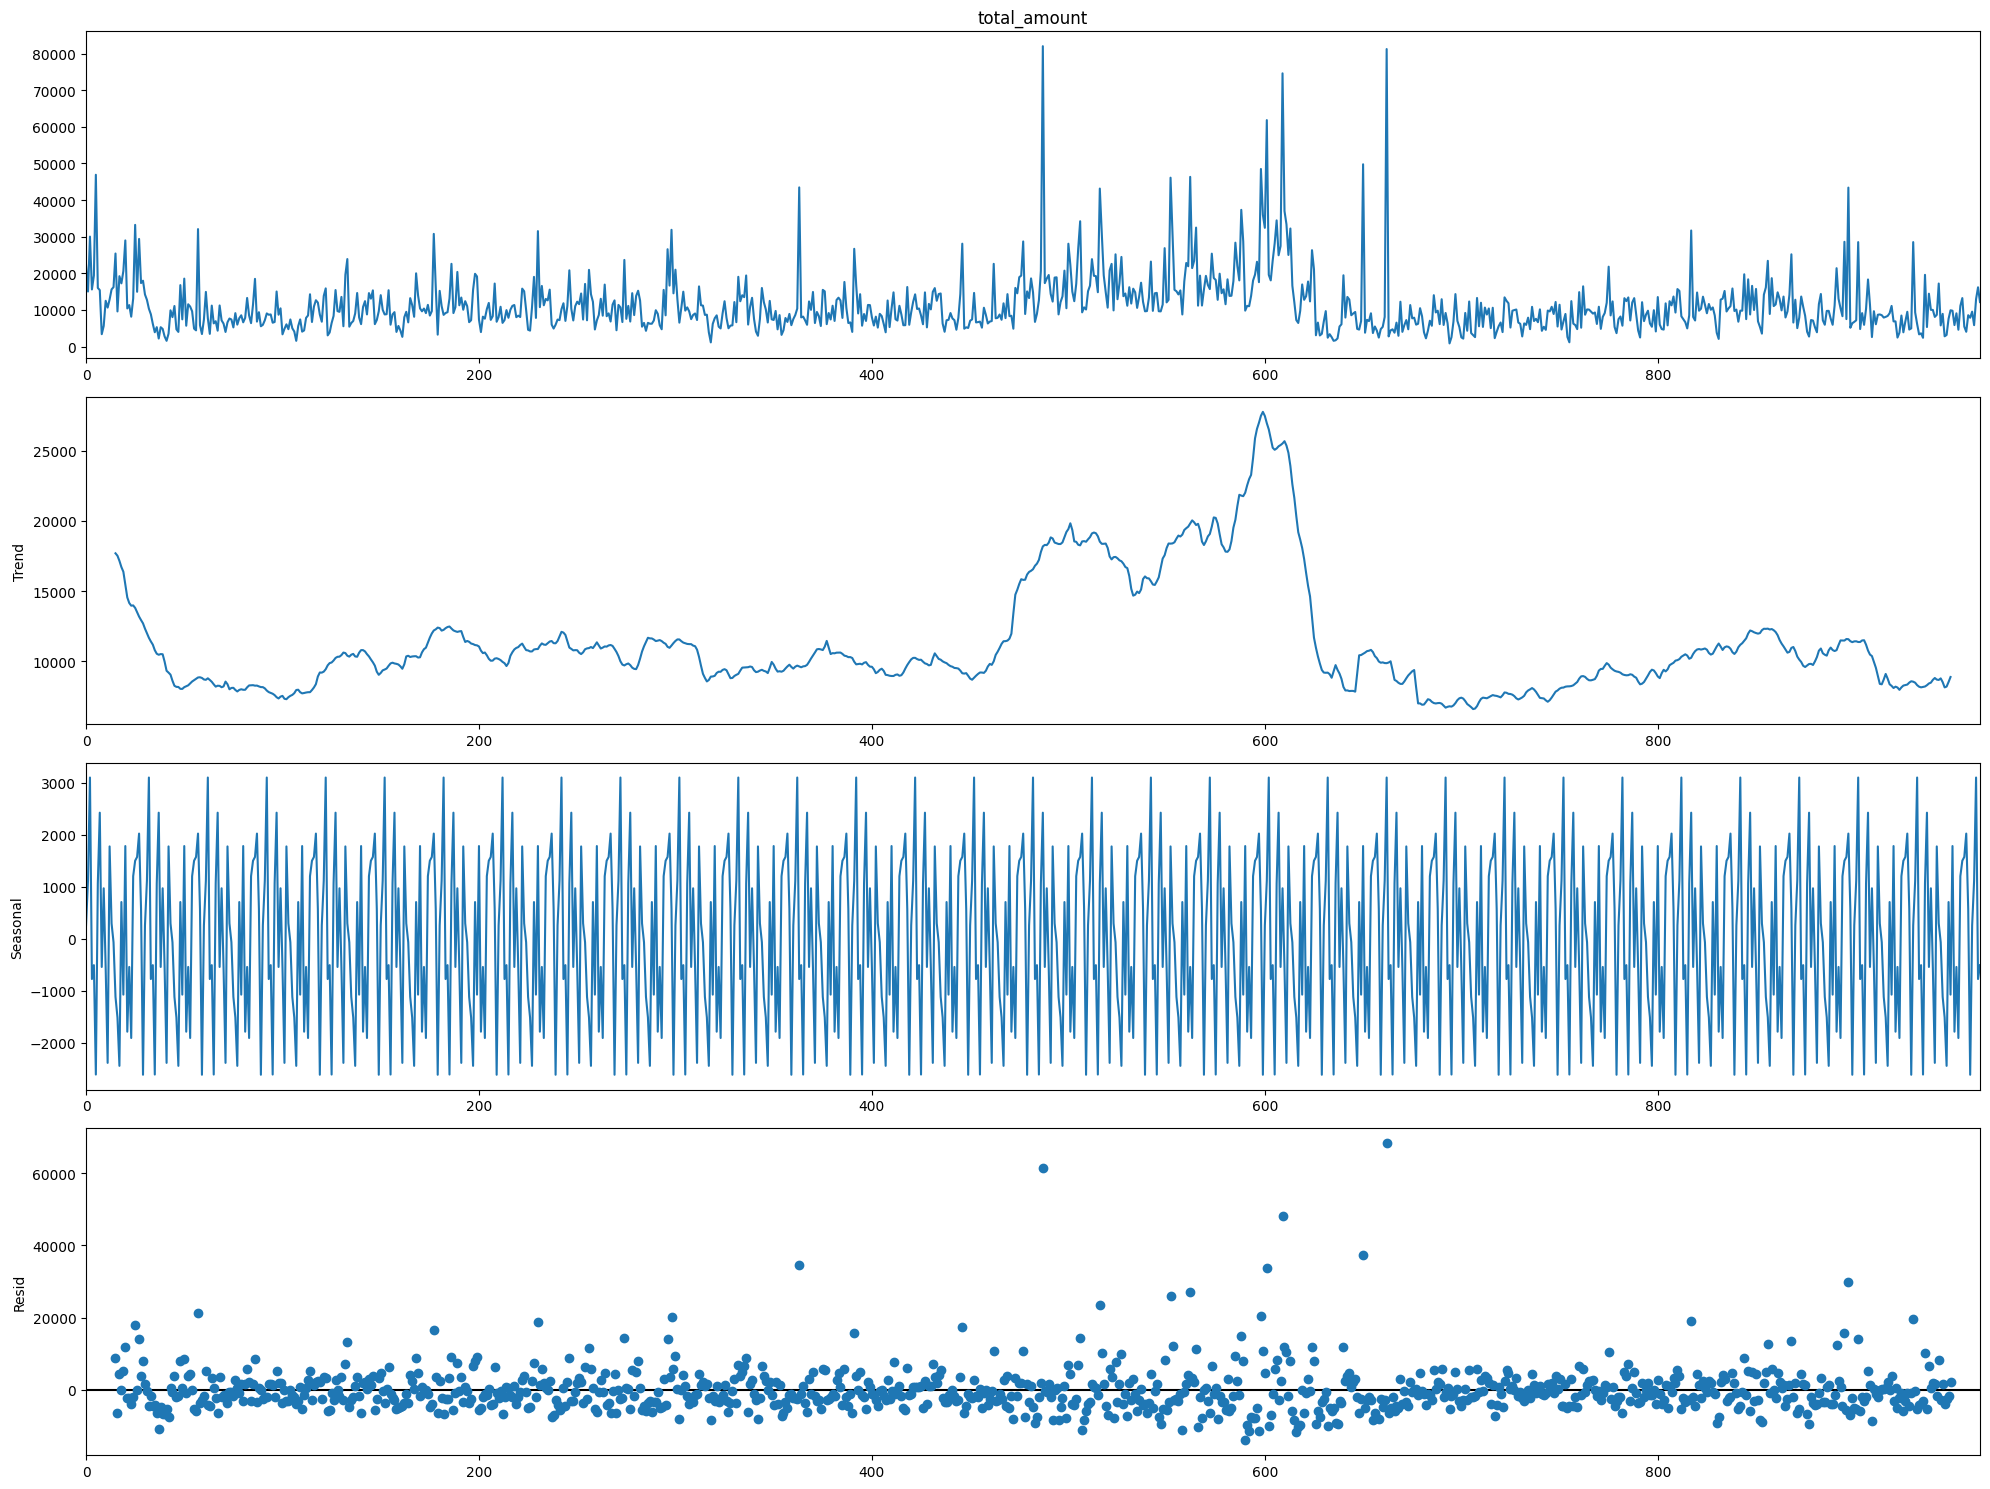

In [42]:
plt.rc("figure", figsize=(20,15))
decomposition = seasonal_decompose(sales_train['total_amount'], 
                                   model='add',
                                   period=30)
decomposition.plot()


## Single Exponential Smoothing

In [21]:
m = 300
alpha = 1 / (2 * m)
sales_train['HWES1'] = SimpleExpSmoothing(sales_train["total_amount"]).fit(smoothing_level=alpha, optimized=False,use_brute=True).fittedvalues
sales['HWES1'] = SimpleExpSmoothing(sales["total_amount"]).fit(smoothing_level=alpha, optimized=False,use_brute=True).fittedvalues

<AxesSubplot: title={'center': 'Holt Winters Single Exponential Smoothing'}>

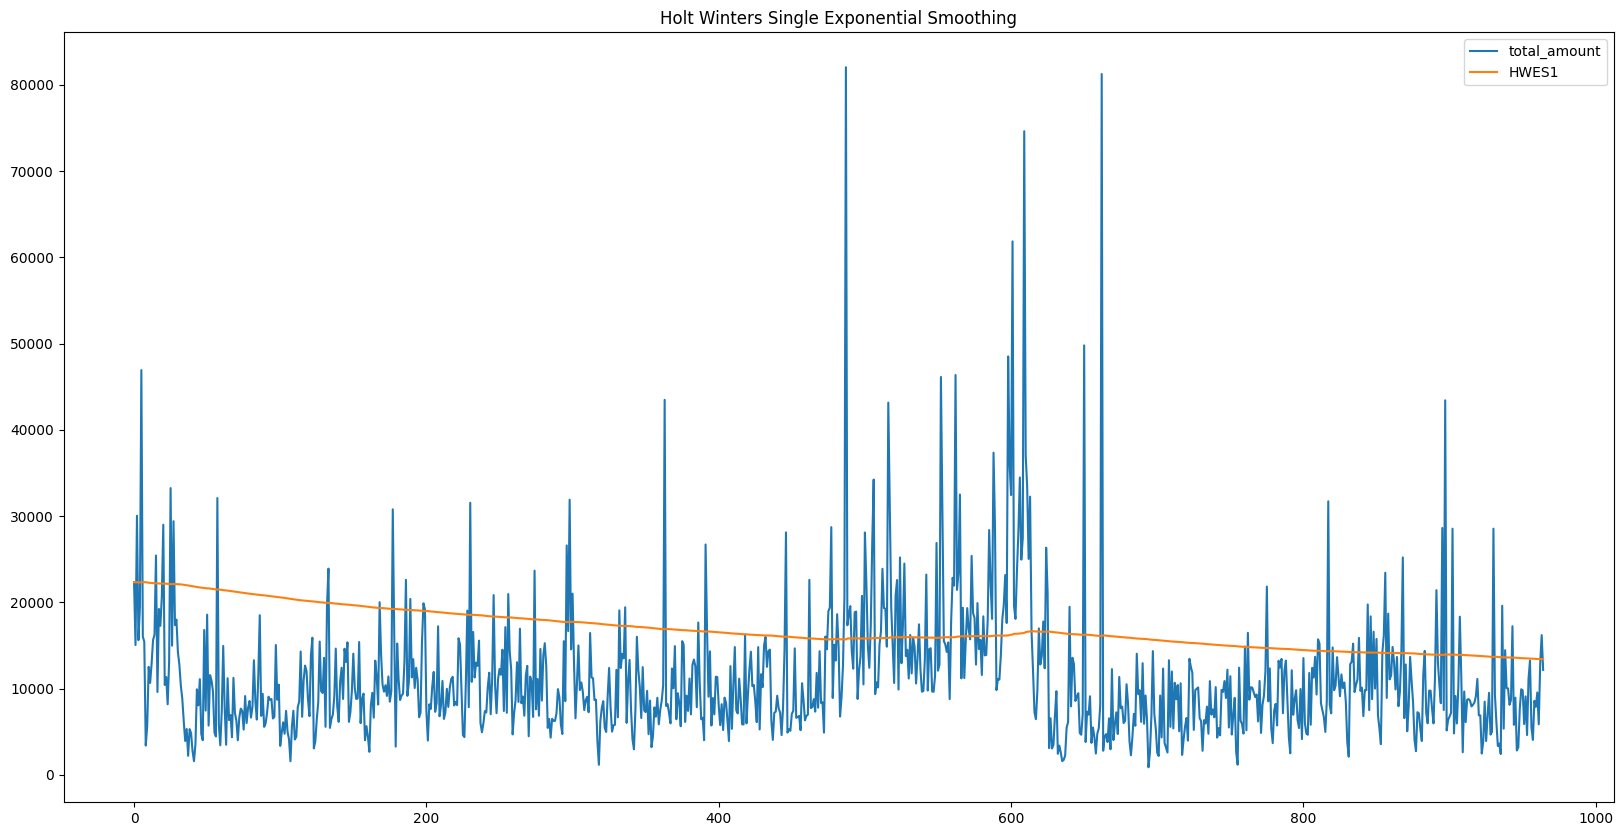

In [22]:
sales_train[['total_amount','HWES1']].plot(figsize=(20,10), title='Holt Winters Single Exponential Smoothing')

## Double HWES

/opt/homebrew/lib/python3.9/site-packages/statsmodels/tsa/holtwinters/model.py:915: ConvergenceWarning:

Optimization failed to converge. Check mle_retvals.

/opt/homebrew/lib/python3.9/site-packages/statsmodels/tsa/holtwinters/model.py:915: ConvergenceWarning:

Optimization failed to converge. Check mle_retvals.

/opt/homebrew/lib/python3.9/site-packages/statsmodels/tsa/holtwinters/model.py:915: ConvergenceWarning:

Optimization failed to converge. Check mle_retvals.

/opt/homebrew/lib/python3.9/site-packages/statsmodels/tsa/holtwinters/model.py:915: ConvergenceWarning:

Optimization failed to converge. Check mle_retvals.

/opt/homebrew/lib/python3.9/site-packages/statsmodels/tsa/holtwinters/model.py:915: ConvergenceWarning:

Optimization failed to converge. Check mle_retvals.

/opt/homebrew/lib/python3.9/site-packages/statsmodels/tsa/holtwinters/model.py:915: ConvergenceWarning:

Optimization failed to converge. Check mle_retvals.



<AxesSubplot: title={'center': 'Holt Winters Double Exponential Smoothing'}>

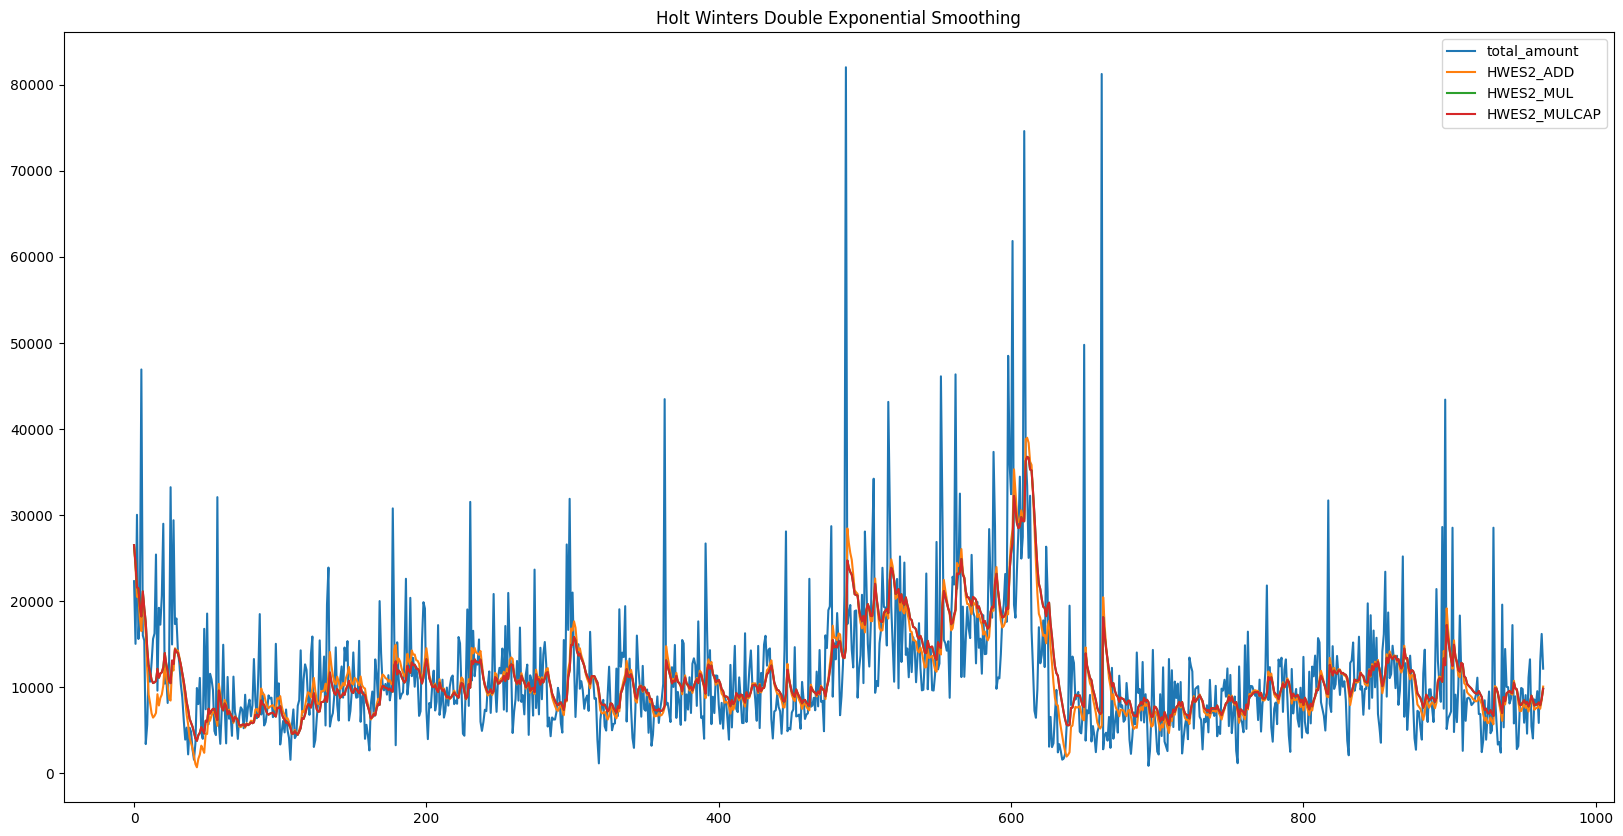

In [23]:

sales_train['HWES2_ADD'] = ExponentialSmoothing(sales_train['total_amount'],trend='add').fit().fittedvalues
sales['HWE2_ADD'] = ExponentialSmoothing(sales['total_amount'],trend='add').fit().fittedvalues
sales_train['HWES2_MUL'] = ExponentialSmoothing(sales_train['total_amount'],trend='mul').fit().fittedvalues
sales['HWE2_MUL'] = ExponentialSmoothing(sales['total_amount'],trend='mul').fit().fittedvalues
sales_train['HWES2_MULCAP'] = ExponentialSmoothing(sales_train['total_amount'],trend='multiplicative').fit().fittedvalues
sales['HWE2_MULCAP'] = ExponentialSmoothing(sales['total_amount'],trend='multiplicative').fit().fittedvalues
sales_train[['total_amount','HWES2_ADD','HWES2_MUL','HWES2_MULCAP']].plot(figsize=(20,10), title='Holt Winters Double Exponential Smoothing')


## Triple HWES

In [24]:
sales_train["HWES3_ADD"] = ExponentialSmoothing(sales_train['total_amount'],trend='add',seasonal='add',seasonal_periods=300).fit().fittedvalues
sales['HWE3_ADD'] = ExponentialSmoothing(sales['total_amount'],trend='add',seasonal='add',seasonal_periods=180).fit().fittedvalues
sales_train['HWES3_MUL'] = ExponentialSmoothing(sales_train['total_amount'],trend='mul',seasonal='mul',seasonal_periods=300).fit().fittedvalues
sales['HWE3_MUL'] = ExponentialSmoothing(sales['total_amount'],trend='mul',seasonal='mul',seasonal_periods=180).fit().fittedvalues
sales_train['HWES3_MULCAP'] = ExponentialSmoothing(sales_train['total_amount'],trend='multiplicative',seasonal='multiplicative',seasonal_periods=300).fit().fittedvalues
sales['HWE3_MULCAP'] = ExponentialSmoothing(sales['total_amount'],trend='multiplicative',seasonal='multiplicative',seasonal_periods=300).fit().fittedvalues
sales_train.head()

/opt/homebrew/lib/python3.9/site-packages/statsmodels/tsa/holtwinters/model.py:915: ConvergenceWarning:

Optimization failed to converge. Check mle_retvals.

/opt/homebrew/lib/python3.9/site-packages/statsmodels/tsa/holtwinters/model.py:915: ConvergenceWarning:

Optimization failed to converge. Check mle_retvals.

/opt/homebrew/lib/python3.9/site-packages/statsmodels/tsa/holtwinters/model.py:915: ConvergenceWarning:

Optimization failed to converge. Check mle_retvals.

/opt/homebrew/lib/python3.9/site-packages/statsmodels/tsa/holtwinters/model.py:915: ConvergenceWarning:

Optimization failed to converge. Check mle_retvals.

/opt/homebrew/lib/python3.9/site-packages/statsmodels/tsa/holtwinters/model.py:915: ConvergenceWarning:

Optimization failed to converge. Check mle_retvals.

/opt/homebrew/lib/python3.9/site-packages/statsmodels/tsa/holtwinters/model.py:915: ConvergenceWarning:

Optimization failed to converge. Check mle_retvals.



,date,total_amount,HWES1,HWES2_ADD,HWES2_MUL,HWES2_MULCAP,HWES3_ADD,HWES3_MUL,HWES3_MULCAP
0,2009-12-01 am,22323.51,22323.510000,26508.451636,26508.451636,26508.451636,25296.982875,23593.299312,23593.299312
1,2009-12-01 pm,15042.81,22323.510000,23999.893919,24353.772548,24353.772548,35598.492493,30628.158483,30628.158483
2,2009-12-02 am,30036.27,22311.375500,20511.648966,21610.406377,21610.406377,8975.273490,10728.461838,10728.461838
3,2009-12-02 pm,15608.40,22324.250324,20660.415139,21484.212677,21484.212677,12553.658629,13066.574265,13066.574265
4,2009-12-03 am,19409.01,22313.057240,17956.011276,19388.921110,19388.921110,17792.872624,17754.684995,17754.684995


<AxesSubplot: title={'center': 'Holt Winters Triple Exponential Smoothing: Additive and Multiplicative Seasonality'}>

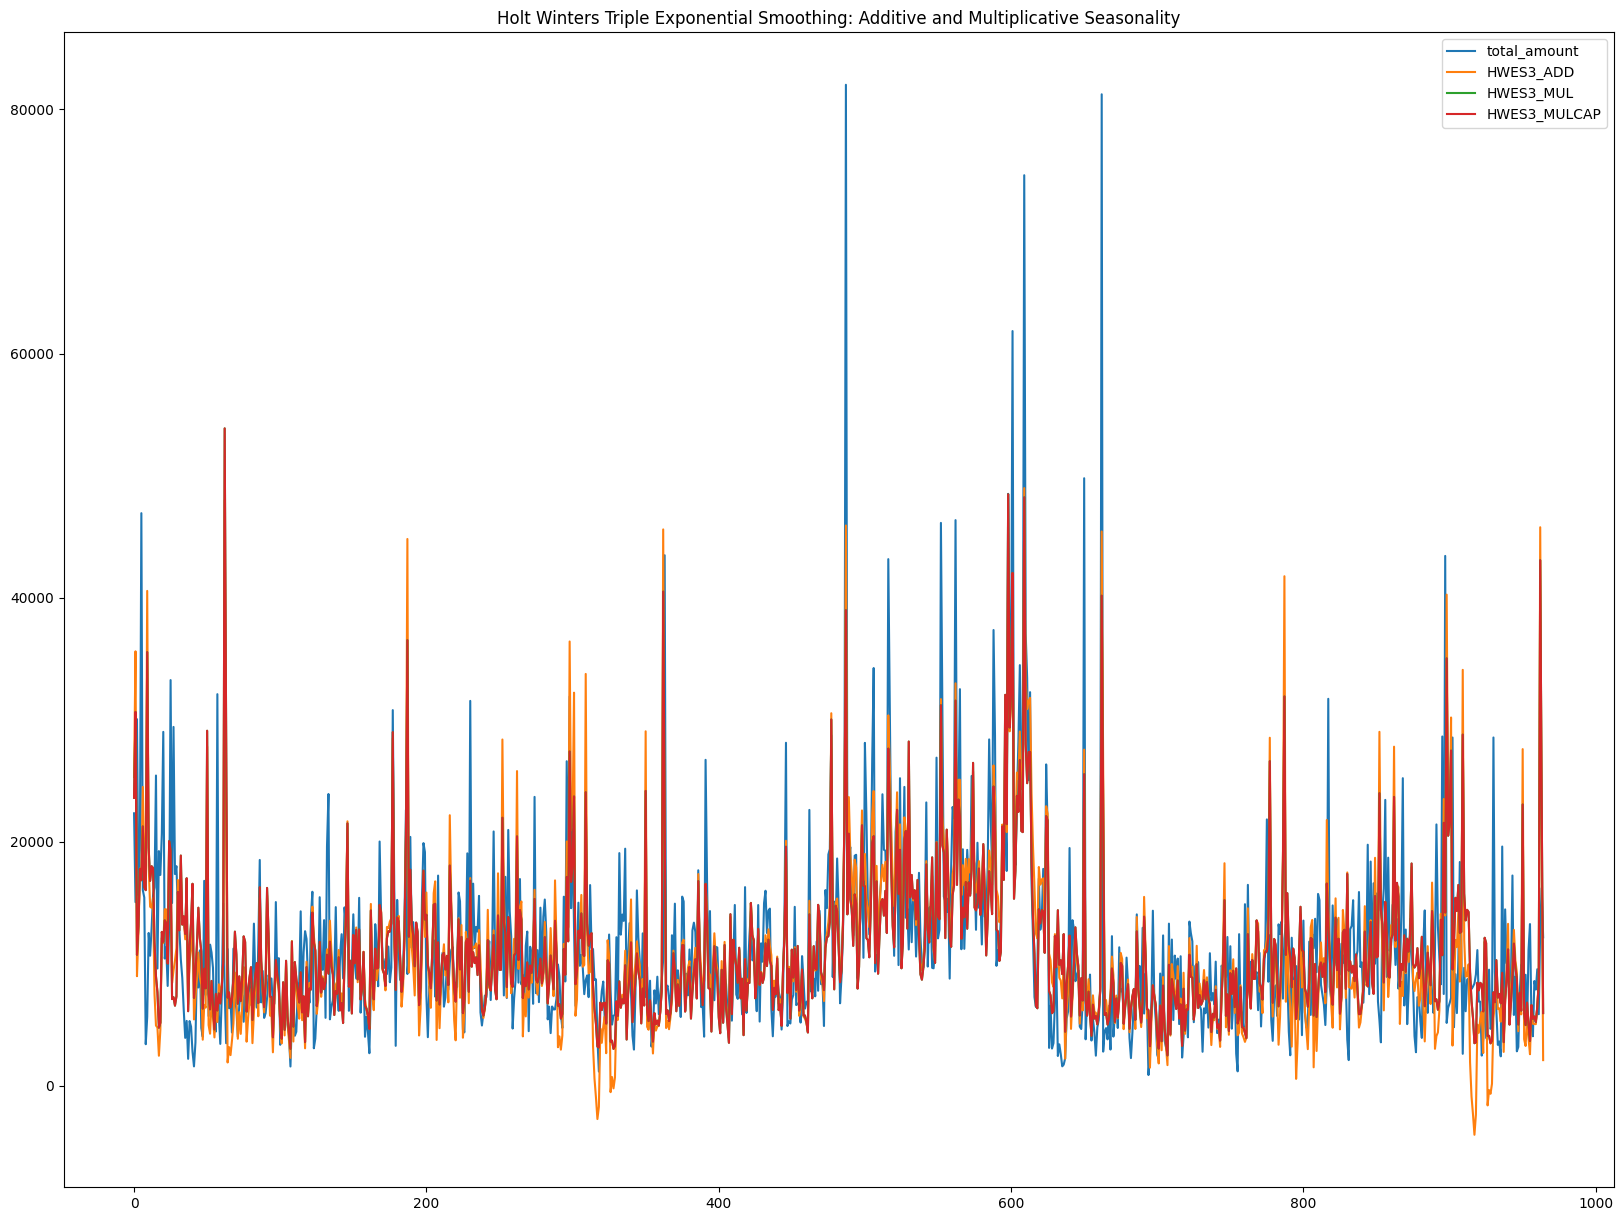

In [25]:
sales_train[['total_amount','HWES3_ADD','HWES3_MUL','HWES3_MULCAP']].plot(title='Holt Winters Triple Exponential Smoothing: Additive and Multiplicative Seasonality')

## Forecasting

In [26]:
len(sales_test)

242

/opt/homebrew/lib/python3.9/site-packages/statsmodels/tsa/holtwinters/model.py:915: ConvergenceWarning:

Optimization failed to converge. Check mle_retvals.



Text(0.5, 1.0, 'Train, Test and Predicted Test using Holt Winters')

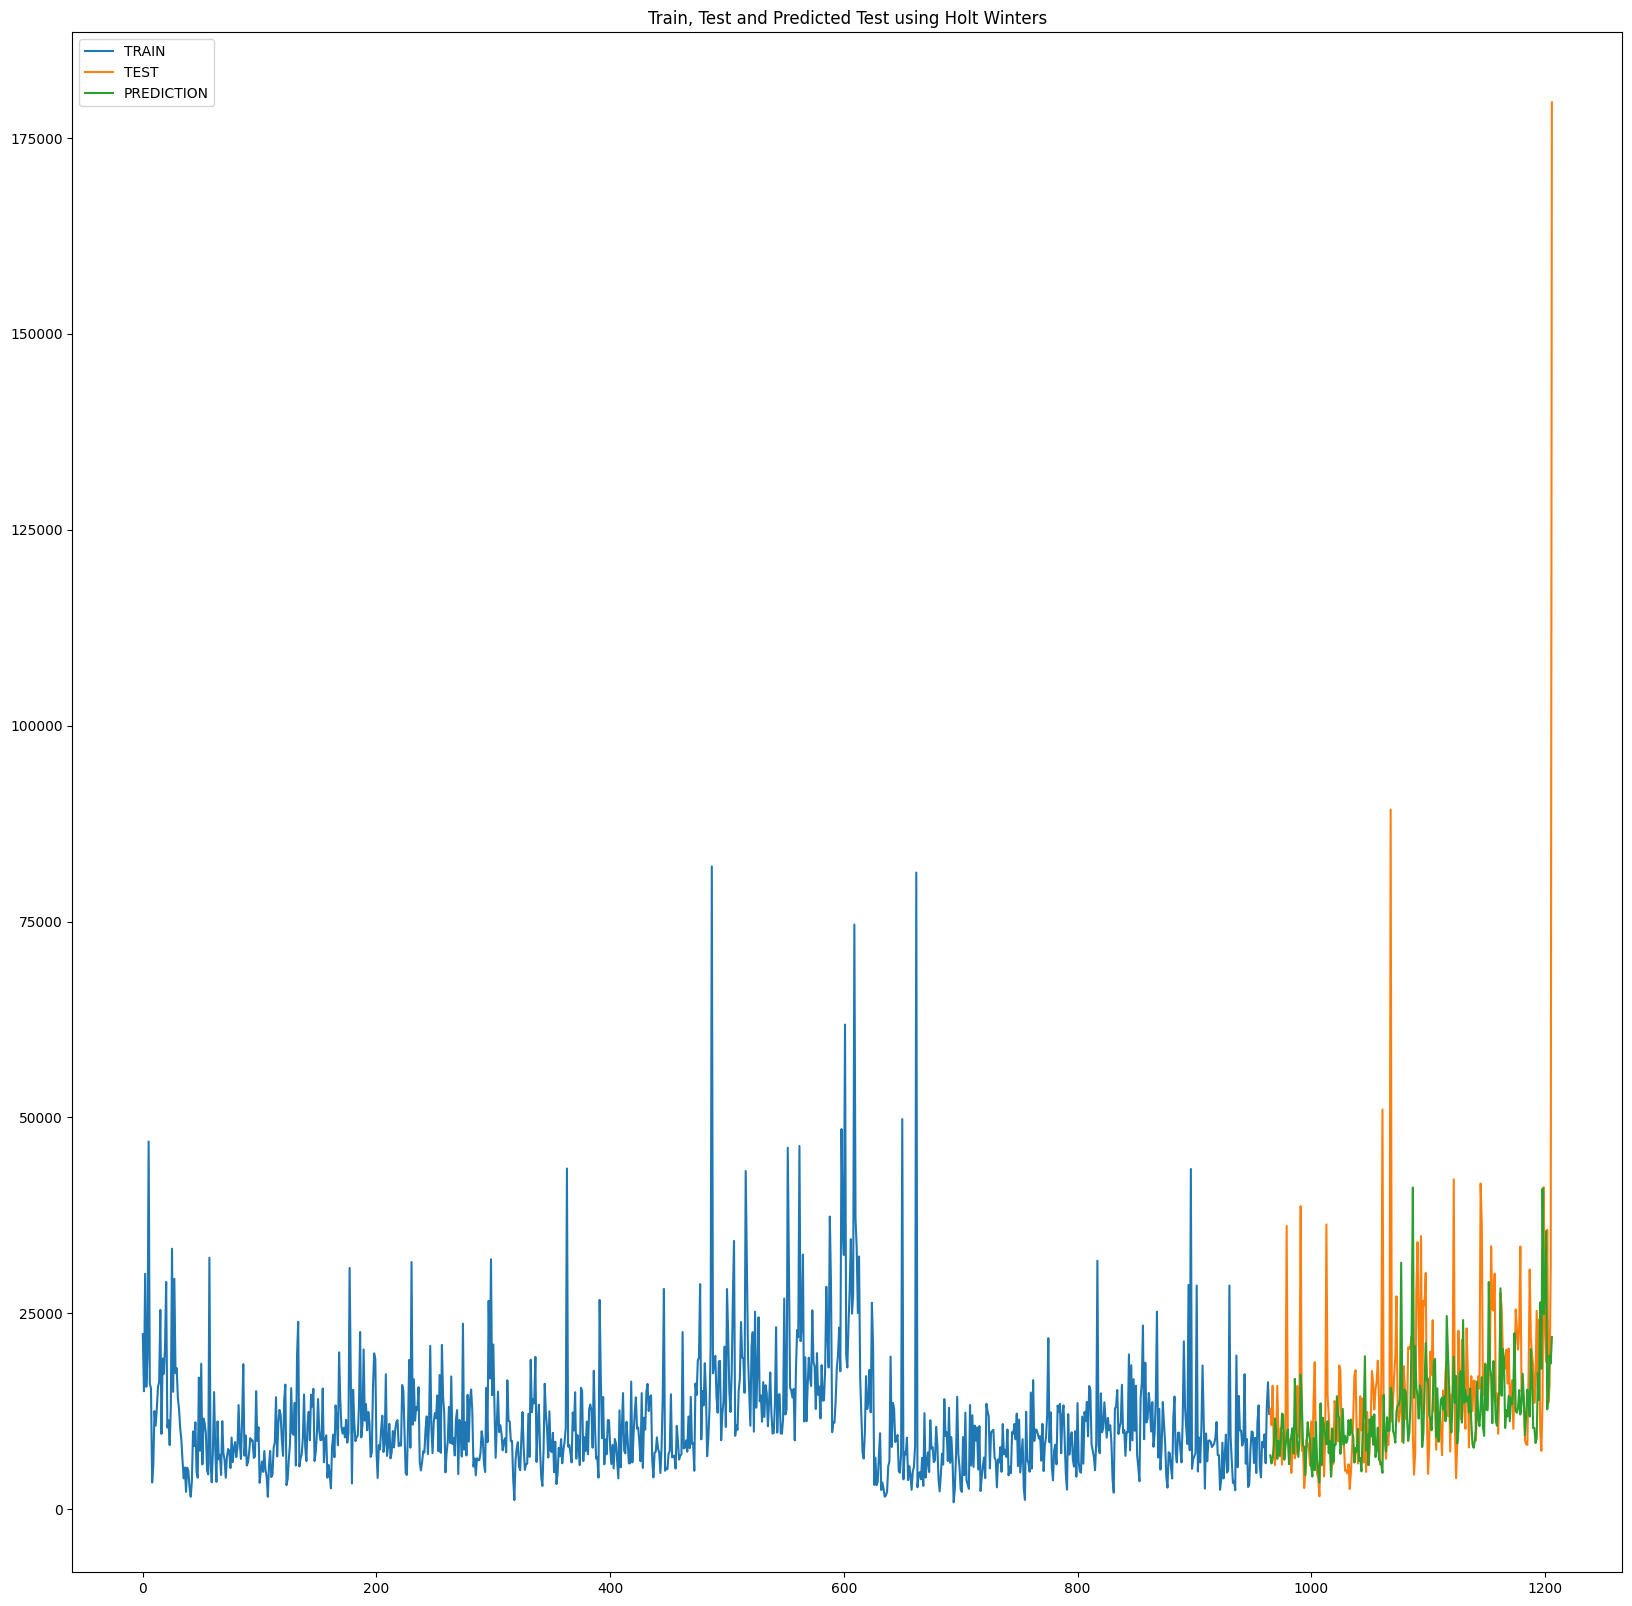

In [27]:
fitted_model = ExponentialSmoothing(sales_train['total_amount'],trend='multiplicative',seasonal='multiplicative',seasonal_periods=300,damped_trend=True).fit()
test_predictions = fitted_model.forecast(len(sales_test))
sales_train['total_amount'].plot(legend=True,label='TRAIN')
sales_test['total_amount'].plot(legend=True,label='TEST',figsize=(20,20))
test_predictions.plot(legend=True,label='PREDICTION')
plt.title('Train, Test and Predicted Test using Holt Winters')

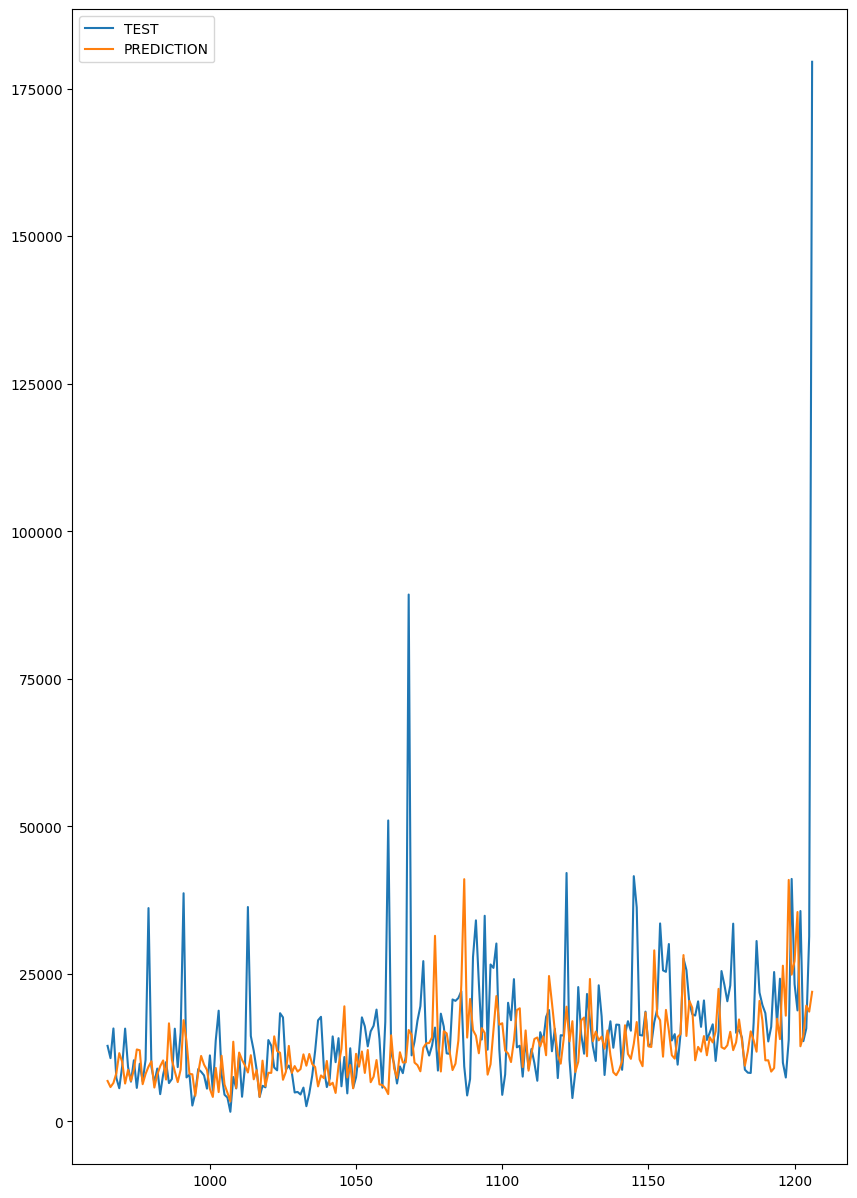

In [28]:
sales_test['total_amount'].plot(legend=True,label='TEST',figsize=(10,15))
test_predictions.plot(legend=True,label='PREDICTION');

In [29]:
print("MAPE: ", mean_absolute_percentage_error(sales_test['total_amount'], test_predictions))

MAPE:  0.46444384648819803


In [30]:
print("MAPE: ", mean_absolute_percentage_error(sales_train['total_amount'], sales_train['HWES3_MULCAP']))

MAPE:  0.47924612508296727


In [31]:
print("MAPE: ", mean_absolute_percentage_error(sales['total_amount'], sales['HWE3_MULCAP']))

MAPE:  0.4499540899783764


In [45]:
def holt_winters_fit(train,periods,step):
    fitted_model = ExponentialSmoothing(train,trend='multiplicative',seasonal='multiplicative',seasonal_periods=periods).fit()
    predict = fitted_model.forecast(step)
    return predict

In [39]:
sales = pd.read_pickle("../Data/sales_half-day.pkl")

In [ ]:
for i in range(1,)

In [48]:
X = sales.drop(['total_amount'], axis=1)
y = sales['total_amount']
mape = []
tss = TimeSeriesSplit(n_splits=10)
for train_index, test_index in tss.split(X):
    X_train, X_test = X.iloc[train_index, :], X.iloc[test_index,:]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    pred = holt_winters_fit(y_train,int(len(y_train)/4),len(y_test))
    mape.append(mean_absolute_percentage_error(y_test, pred))

/opt/homebrew/lib/python3.9/site-packages/statsmodels/tsa/holtwinters/model.py:915: ConvergenceWarning:

Optimization failed to converge. Check mle_retvals.

/opt/homebrew/lib/python3.9/site-packages/statsmodels/tsa/holtwinters/model.py:915: ConvergenceWarning:

Optimization failed to converge. Check mle_retvals.

/opt/homebrew/lib/python3.9/site-packages/statsmodels/tsa/holtwinters/model.py:915: ConvergenceWarning:

Optimization failed to converge. Check mle_retvals.

/opt/homebrew/lib/python3.9/site-packages/statsmodels/tsa/holtwinters/model.py:915: ConvergenceWarning:

Optimization failed to converge. Check mle_retvals.

/opt/homebrew/lib/python3.9/site-packages/statsmodels/tsa/holtwinters/model.py:915: ConvergenceWarning:

Optimization failed to converge. Check mle_retvals.

/opt/homebrew/lib/python3.9/site-packages/statsmodels/tsa/holtwinters/model.py:915: ConvergenceWarning:

Optimization failed to converge. Check mle_retvals.

/opt/homebrew/lib/python3.9/site-packages/statsmodel

In [49]:
print("Average MAPE: ", np.mean(mape))

Average MAPE:  0.577162590030208
